In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
# import 

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

running on the CPU


In [3]:
x = torch.rand((1024, 2))
y = x[:, 0].pow(2) + 2 * x[:, 1].pow(2)

### training

In [4]:
from torchsummary import summary

In [5]:
model = nn.Sequential(
    nn.Linear(2, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Flatten(0, 1)
)

In [6]:
summary(model, (32, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 32]              96
              ReLU-2               [-1, 32, 32]               0
            Linear-3               [-1, 32, 32]           1,056
              ReLU-4               [-1, 32, 32]               0
            Linear-5               [-1, 32, 32]           1,056
              ReLU-6               [-1, 32, 32]               0
            Linear-7               [-1, 32, 32]           1,056
              ReLU-8               [-1, 32, 32]               0
            Linear-9                [-1, 32, 8]             264
             ReLU-10                [-1, 32, 8]               0
           Linear-11                [-1, 32, 1]               9
          Flatten-12                    [-1, 1]               0
Total params: 3,537
Trainable params: 3,537
Non-trainable params: 0
-----------------------------------

In [7]:
model(torch.rand(3, 2))

tensor([-0.2539, -0.2541, -0.2562], grad_fn=<ViewBackward0>)

In [8]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [9]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
for t in range(10_000):

    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if t % 1000 == 999:
        print(f"\t {t} --- {loss.item()}", end='\r')

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


In [11]:
x_test = torch.vstack((torch.linspace(-10, 10, 100), torch.linspace(-10, 10, 100))).t()

# y_true = x_test[:, 0].pow(2) + 2 * x_test[:, 1].pow(2)
# y_test = model(x_test)
# y_true.shape == y_test.shape

In [12]:
x.requires_grad = True

In [13]:
torch.vstack([torch.autograd.grad(outputs=out, inputs=x, retain_graph=True)[0][i] 
    for i, out in enumerate(model(x))])

tensor([[1.1788, 2.5880],
        [0.3128, 0.2138],
        [0.3848, 1.4028],
        ...,
        [0.8210, 2.0791],
        [0.1563, 0.0688],
        [1.4176, 3.2751]])

In [14]:
d = torch.vstack((2 * x[:, 0], 4 * x[:, 1])).t() - torch.vstack([torch.autograd.grad(outputs=out, inputs=x, retain_graph=True)[0][i] 
    for i, out in enumerate(model(x))])
print(d.mean(axis=1), d.min(axis=1), d.max(axis=1))

tensor([ 0.0941, -0.0160,  0.0852,  ...,  0.0452, -0.0068,  0.0147],
       grad_fn=<MeanBackward1>) torch.return_types.min(
values=tensor([ 0.0528, -0.0386,  0.0255,  ..., -0.0083, -0.0478, -0.1191],
       grad_fn=<MinBackward0>),
indices=tensor([0, 0, 0,  ..., 0, 0, 1])) torch.return_types.max(
values=tensor([0.1353, 0.0066, 0.1449,  ..., 0.0986, 0.0342, 0.1485],
       grad_fn=<MaxBackward0>),
indices=tensor([1, 1, 1,  ..., 1, 1, 0]))


In [15]:
torch.autograd.functional.jacobian(model, x.T).sum(axis=2)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x1024 and 2x32)

In [31]:
x = torch.Tensor([[1, 2, 0], [2, 3, 1.57], [3, 4, 0]])
x.requires_grad = True

def model(x): return x[0] ** 3 + 3 * x[1] + (x[2])

# y = model(x)
# 2 * x_test[:, 0] 

/home/suraj/MS-Research/cbf-learning-tuning/safe-ctrl/lib/python3.8/site-packages/numpy/core/_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/suraj/MS-Research/cbf-learning-tuning/safe-ctrl/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

ValueError: x and y must have same first dimension, but have shapes torch.Size([100, 2]) and (1024,)

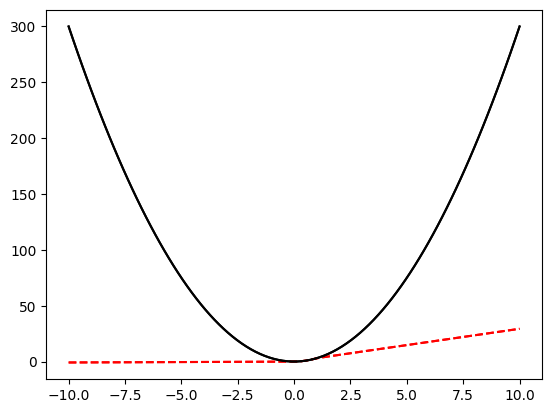

In [ ]:
plt.plot(x_test, y_test.detach(), '--r')
plt.plot(x_test, y_true, '-k')
plt.plot(x_test, y_grad, '-g')

In [ ]:
## Testing other example

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math
from torchsummary import summary

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

xx.shape

torch.Size([2000, 3])

In [ ]:
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Linear(3, 1),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

summary(model, (1, 3))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               4
           Flatten-2                    [-1, 1]               0
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
model(torch.rand(3, 3))

tensor([-0.3561, -0.5880, -0.4969], grad_fn=<ViewBackward0>)

In [ ]:
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(5000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()



99 44810.0546875
199 24305.4296875
299 12205.3076171875
399 5309.8427734375
499 2030.86865234375
599 940.8536376953125
699 729.8350830078125
799 665.4622192382812
899 588.06787109375
999 493.1865234375
1099 391.69140625
1199 295.42242431640625
1299 211.72804260253906
1399 143.3810272216797
1499 90.77976989746094
1599 53.10417938232422
1699 28.823280334472656
1799 15.66884994506836
1899 10.309791564941406
1999 9.001852989196777
2099 8.948904991149902
2199 8.963423728942871
2299 8.90808391571045
2399 8.905570983886719
2499 8.924489974975586
2599 8.926509857177734
2699 8.918984413146973
2799 8.91878890991211
2899 8.921513557434082
2999 8.9214506149292
3099 8.920469284057617
3199 8.920533180236816
3299 8.920881271362305
3399 8.920838356018066
3499 8.920721054077148
3599 8.92074203491211
3699 8.92077350616455
3799 8.920769691467285
3899 8.920757293701172
3999 8.92075252532959
4099 8.920755386352539
4199 8.920758247375488
4299 8.920759201049805
4399 8.920766830444336
4499 8.920766830444336
4

In [ ]:
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + \
      {linear_layer.weight[:, 0].item()} x +    \
      {linear_layer.weight[:, 1].item()} x^2 + \
      {linear_layer.weight[:, 2].item()} x^3')

Result: y = -0.0005000268574804068 +       0.8572408556938171 x +          -0.0005000288365408778 x^2 +       -0.0928303524851799 x^3


In [ ]:
x_test = torch.linspace(-math.pi, math.pi, 100)
p = torch.tensor([1, 2, 3])
xx = x_test.unsqueeze(-1).pow(p)
y_test = model(xx)

In [ ]:
import matplotlib.pyplot as plt

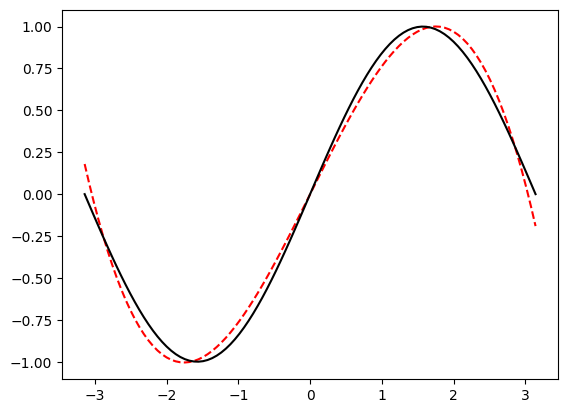

In [ ]:
plt.plot(x_test, y_test.detach(), '--r')
plt.plot(x_test, torch.sin(x_test), '-k')

# CBF Training

In [10]:
def car_kinematics(states, t, inputs, params={'Lf':0.2, 'Lr': 0.2}):
    Lf, Lr = params.values()
    lin_accel, steer_ang = inputs
    x_pos, y_pos, yaw_ang, lin_vel =  states
    slip_ang = np.arctan(Lf * np.tan(steer_ang) / (Lf + Lr))
    x_dot = lin_vel * np.cos(yaw_ang + slip_ang)
    y_dot = lin_vel * np.sin(yaw_ang + slip_ang)
    yaw_dot = lin_vel / (Lf + Lr) * np.tan(steer_ang) 
    vel_dot = lin_accel
    return np.array([x_dot, y_dot, yaw_dot, vel_dot])
     

In [11]:
from scipy.integrate import odeint

In [12]:
init_pose = (0, 0, -np.pi / 2)
init_state = np.array([*init_pose, 0]) # inital velocity is zero

state_traj = odeint(car_kinematics, 
                    init_state, 
                    np.arange(0, 1, 0.01), 
                    args=(np.ones(2),))
xs, ys, vs = state_traj[:, 0], state_traj[:, 1], state_traj[:, -1] 

(-0.020930211202011433,
 0.43953443524224006,
 -0.10491738618402356,
 0.024670350532091323)

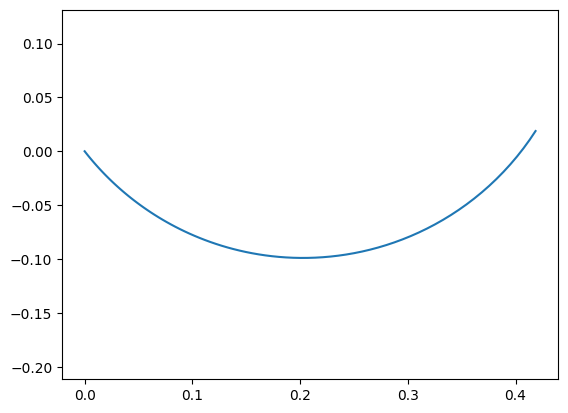

In [13]:
plt.plot(xs, ys)
plt.axis('equal')

In [14]:
from matplotlib.patches import Circle, Rectangle

(-2.0, 6.0, -2.0, 2.0)

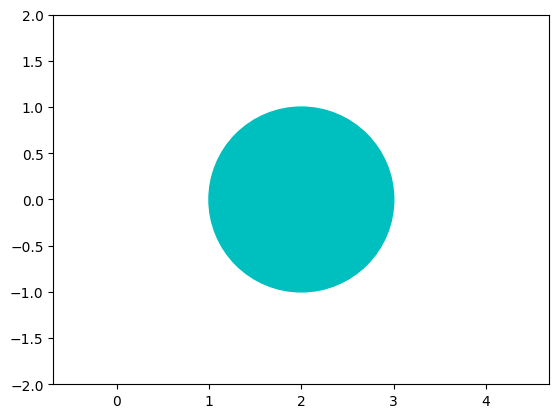

In [15]:
plt.gca().add_patch(Circle((2, 0), 1, color='c'))
plt.axis('equal'); plt.axis([-2, 6, -2, 2])

In [16]:
init_pose = (1, 1, np.pi / 2)
init_state = np.array([*init_pose, 0]) # inital velocity is zero

state_traj = odeint(car_kinematics, 
                    init_state, 
                    np.arange(0, 5, 0.1), 
                    args=(np.ones(2) * 0.1,))
xs, ys, vs = state_traj[:, 0], state_traj[:, 1], state_traj[:, -1] 

(-0.2, 4.2, -0.2, 4.2)

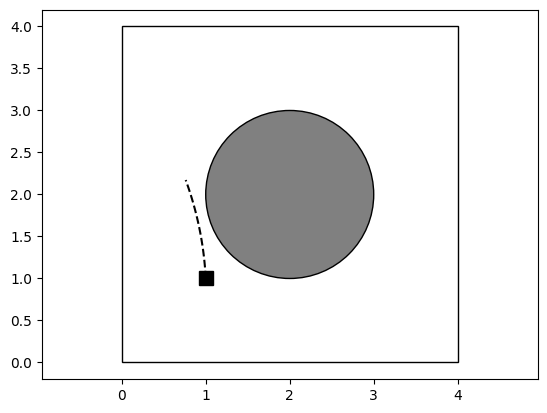

In [17]:
plt.gca().add_patch(Rectangle((0, 0), 4, 4, fc='none', ec='k'))
plt.gca().add_patch(Circle((2, 2), 1, fc='grey', ec='k'))
plt.plot(init_pose[0], init_pose[1], 'sk', ms=10)
plt.plot(xs, ys, '--k')
plt.axis('equal')

In [18]:
np.random.uniform()

0.6602990071919325

While creating the cbf the constraints are specified **only for x, y** positions without any account for **yaw** and **velocity**. However there must be a dependency of the value calculated by the cbf based on how fast it is apporoaching and what direction it has headed. These configurations could be different even on the same position and crucially decided if the system is safe or not. Hence, fine tunig must start with random value for them but in turn learn the constraints in their space.

We could define addition constraints including the above two states but however, we will be restricting performance (slow movements in case of velocity even when the system is far from obstacles). Since it is difficult to hardcode every possible such configurations manually, we need to learn the cbf in that way.
\

Sometimes input is not in the same format as the dynamics and then input constraints must be taken into account as well. For instance, when pressing gas for throttle, we cannot certainly restrict the acceleration below a desired value.

In [19]:
N = 10000 # total number of samples
np.random.seed(11)
samples = np.random.uniform(
    low=(-1, -1, -np.pi, 0), 
    high=(5, 5, np.pi, 10),  
    size=(N, 4))

In [20]:
def is_safe(position):
    x, y = position
    # outside circle with center at (2, 2) and radius 1
    # inside square with bottom-left corner at (0, 0) and sides 4
    return 0 <= x <= 4 and 0 <= y <= 4 and (x - 2) ** 2 + (y - 2) ** 2 > 1

In [21]:
labels = np.array([1 if y else -1 for y in map(is_safe, samples[:, :2])])
labels[labels == 1].sum() # safe

3557

In [22]:
from torchsummary import summary

In [23]:
model = nn.Sequential(
    nn.Linear(4, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Tanh(),
    nn.Flatten(0, 1)
)

In [24]:
summary(model, (1, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]             640
              ReLU-2               [-1, 1, 128]               0
            Linear-3                 [-1, 1, 1]             129
              Tanh-4                 [-1, 1, 1]               0
           Flatten-5                    [-1, 1]               0
Total params: 769
Trainable params: 769
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [25]:
model(torch.rand(1, 4))

tensor([0.1704], grad_fn=<ViewBackward0>)

In [26]:
x = torch.from_numpy(samples.astype(np.float32))
y = torch.from_numpy(labels.astype(np.float32))

In [27]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [28]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
history = []

In [30]:
for t in range(10_000):

    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if t % 500 == 0:
        print(f"\t {t} --- {loss.item():.5f}", end='\r')
        history.append([t, loss.item()])

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

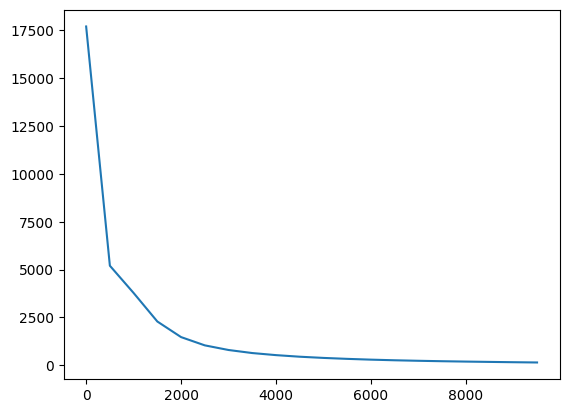

In [31]:
history = np.array(history)
plt.plot(history[:, 0], history[:, 1])

In [32]:
pp = np.arange(-2, 6, 0.1)
xx, yy = map(np.ravel, np.meshgrid(pp, pp))
grid = np.vstack([xx, yy, np.zeros((2, xx.shape[0]))]).T
values = model(torch.from_numpy(grid.astype(np.float32)))

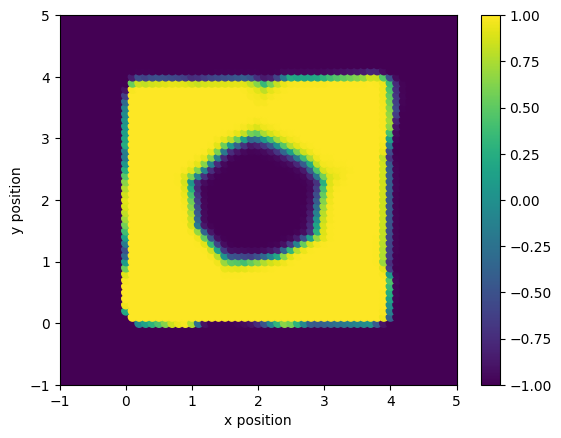

In [33]:
plt.scatter(xx, yy, c=values.detach().numpy())
plt.axis([-1, 5, -1, 5])
plt.xlabel('x position')
plt.ylabel('y position')
plt.colorbar()

> Should Tune for $V$ and $Yaw$

In [34]:
vv = np.ones(xx.shape[0]) * 10 # full velocity
grid = np.vstack([xx, yy, np.zeros(xx.shape[0]), vv]).T
values = model(torch.from_numpy(grid.astype(np.float32)))

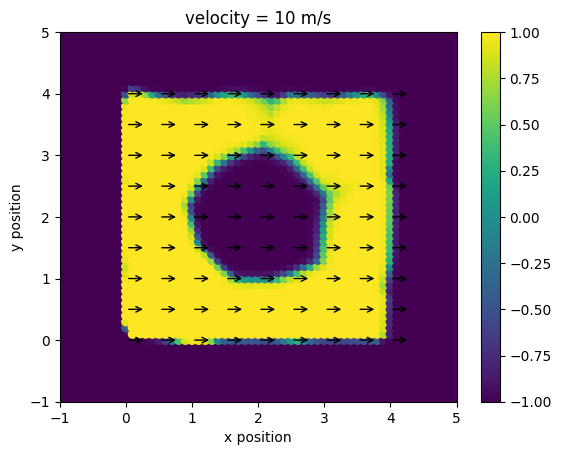

In [35]:
a_pp = np.arange(0, 4.5, 0.5)
a_xx, a_yy = map(np.ravel, np.meshgrid(a_pp, a_pp))

# plt.figure(figsize=(16, 4))
# plt.subplot(141)
a_xx2, a_yy2 = a_xx + 0.3 * np.cos(0), a_yy + 0.3 * np.sin(0) 
for a_x, a_y, a_x2, a_y2 in zip(a_xx, a_yy, a_xx2, a_yy2):
    # print(a_x, a_y, a_x2, a_y2)
    plt.annotate("", xytext=(a_x, a_y), xy=(a_x2, a_y2), arrowprops=dict(arrowstyle='->', color='k'))
plt.axis([-1, 5, -1, 5])
plt.title('velocity = 10 m/s')
plt.xlabel('x position')
plt.ylabel('y position')
plt.scatter(xx, yy, c=values.detach().numpy())
plt.colorbar()


In [36]:
x_pos = 0.0
y_pos = 3.0
yaw_ang = -np.pi
lin_vel = 9.0

model(torch.tensor([[x_pos, y_pos, yaw_ang, lin_vel]]))

tensor([-0.8369], grad_fn=<ViewBackward0>)

### Algorithm:
* policy $\pi(x)$ - explores action and tries to make unsafe
* barrier $h(x)$ - shields action at each timestep to keep safe

inputs - $x(t)$ (states), $\mathcal{N}_{\pi(x)}$ (policy NN) and $\mathcal{N}_{h(x)}$ (cbf NN) 

<pre>
1.     calculate action from policy NNet
2.     obtain next state from system dynamics eq (or simulator)
3.     calculate safety estimate from barrier certificate NNet
4.     if policy takes to unsafe: 
5.        if barrier detects unsafe:
6             barrier <- (small)* reward
7.            policy <- (small)* penalty
8.        otherwise (simulator flags unsafe):
9.            barrier <- (huge)* penalty
10.           policy <- (huge)* reward
11.           break;
12.    otherwise (system still safe):
13.         if barrier detects unsafe:
14.             barrier <- (huge)* penalty
15.             policy <- (small)* penalty
16.         otherwise (barrier detects safe):
17.             barrier <- (small)* reward
18.             if early (in episode)
19.                 policy <- (small)* penalty
20.             otherwise (quite later)
21.                 policy <- (huge)* penalty
22.             continue;
23.     if episode ends:
24.         barrier <- (small)* reward
25.         policy <- (huge)* penalty
26.     Backpropagate to learn weights for both NNets
27.     if num_epochs (or total timesteps) reached:
28.         return tuned barrier certificate NNet
</pre>
\*  **NOTE**: values for 'small' and 'huge' depend on barrier safety estimate and timestep of the training episode while implementation

## TO explore

> Backprop Regression Values for CBF (use in reward)

How to initially train such that above states are already taken into account in the cbf

> Train in the way suggested by `woodcock et al.` in FAC, 2021

> Sample from trajectories driven by nominal controllers

---


if $r(t) \geq 0$ then
    if `safe_monitor`(x(t), u(t))

1. calculate action $u(t) = \mathcal{N}_{\pi(x)}(x(t))$
2. obtain next state $x(t+1)$ = $f(x(t), u(t))$ (or from simulator after applying action $u(t)$)
3. calculate safety estimate $v(t) = \mathcal{N}_{h(x)}(x(t + 1))$ 
4

In [37]:
True

True

In [38]:
from marllib import marl
# prepare env
env = marl.make_env(environment_name="mpe", map_name="simple_spread")
# initialize algorithm with appointed hyper-parameters
mappo = marl.algos.mappo(hyperparam_source="mpe")
# build agent model based on env + algorithms + user preference
model = marl.build_model(env, mappo, {"core_arch": "mlp", "encode_layer": "128-256"})
# start training
mappo.fit(env, model, stop={"timesteps_total": 1000000}, checkpoint_freq=100, share_policy="group")

ModuleNotFoundError: No module named 'marllib'

In [ ]:
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Linear(3, 1),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

summary(model, (1, 3))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               4
           Flatten-2                    [-1, 1]               0
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
model(torch.rand(3, 3))

tensor([-0.3561, -0.5880, -0.4969], grad_fn=<ViewBackward0>)

In [ ]:
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(5000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()



99 44810.0546875
199 24305.4296875
299 12205.3076171875
399 5309.8427734375
499 2030.86865234375
599 940.8536376953125
699 729.8350830078125
799 665.4622192382812
899 588.06787109375
999 493.1865234375
1099 391.69140625
1199 295.42242431640625
1299 211.72804260253906
1399 143.3810272216797
1499 90.77976989746094
1599 53.10417938232422
1699 28.823280334472656
1799 15.66884994506836
1899 10.309791564941406
1999 9.001852989196777
2099 8.948904991149902
2199 8.963423728942871
2299 8.90808391571045
2399 8.905570983886719
2499 8.924489974975586
2599 8.926509857177734
2699 8.918984413146973
2799 8.91878890991211
2899 8.921513557434082
2999 8.9214506149292
3099 8.920469284057617
3199 8.920533180236816
3299 8.920881271362305
3399 8.920838356018066
3499 8.920721054077148
3599 8.92074203491211
3699 8.92077350616455
3799 8.920769691467285
3899 8.920757293701172
3999 8.92075252532959
4099 8.920755386352539
4199 8.920758247375488
4299 8.920759201049805
4399 8.920766830444336
4499 8.920766830444336
4

In [1]:
import gymnasium as gym

from stable_baselines3 import A2C

env = gym.make("CartPole-v1", render_mode="human")

model = A2C("MlpPolicy", env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [4]:
model.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=2, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [7]:
for a in model.policy.parameters():
    print(a.shape)

torch.Size([64, 4])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([64, 4])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([2, 64])
torch.Size([2])
torch.Size([1, 64])
torch.Size([1])


In [151]:
with torch.no_grad():
    model.policy.get_submodule('mlp_extractor.policy_net.0').weight[0, 0] = -1.9999

In [9]:
import torch

In [28]:
model.get_parameters()

{'policy': OrderedDict([('mlp_extractor.policy_net.0.weight',
               tensor([[ 5.5475e-02,  1.3174e-01, -4.7377e-02, -6.6510e-03],
                       [-1.7612e-01,  4.5077e-02,  9.5196e-02, -3.5048e-02],
                       [ 1.5949e-01, -2.0343e-01, -7.3767e-02,  1.4594e-01],
                       [-2.0468e-02,  1.3555e-01, -1.4484e-01,  9.6969e-02],
                       [ 2.1972e-01,  3.7402e-01, -4.0494e-04, -3.4005e-01],
                       [ 4.1881e-02, -2.0979e-01,  1.8958e-01,  8.8882e-02],
                       [-3.1281e-01, -1.7824e-01,  2.2693e-01,  1.1424e-01],
                       [ 7.0761e-02,  1.9607e-01,  2.8128e-01, -2.1560e-01],
                       [-7.4006e-02,  2.2806e-01, -9.3092e-02, -1.8297e-01],
                       [-1.8703e-01, -8.1266e-02,  4.3559e-02,  1.4329e-01],
                       [-1.5203e-01, -1.2226e-01, -3.0498e-01, -2.3085e-01],
                       [ 5.4013e-03,  7.9404e-02,  1.2018e-01,  1.3064e-01],
              

In [21]:
model.set_parameters?

Signature:
model.set_parameters(
    load_path_or_dict: Union[str, Dict[str, torch.Tensor]],
    exact_match: bool = True,
    device: Union[torch.device, str] = 'auto',
) -> None
Docstring:
Load parameters from a given zip-file or a nested dictionary containing parameters for
different modules (see ``get_parameters``).

:param load_path_or_iter: Location of the saved data (path or file-like, see ``save``), or a nested
    dictionary containing nn.Module parameters used by the policy. The dictionary maps
    object names to a state-dictionary returned by ``torch.nn.Module.state_dict()``.
:param exact_match: If True, the given parameters should include parameters for each
    module and each of their parameters, otherwise raises an Exception. If set to False, this
    can be used to update only specific parameters.
:param device: Device on which the code should run.
File:      /opt/homebrew/Caskroom/miniforge/base/envs/RL/lib/python3.10/site-packages/stable_baselines3/common/base_class.

In [32]:
model.set_parameters(({'policy.mlp_extractor.policy_net.0.weight': torch.nn.Parameter(torch.randn(64, 64))}), exact_match=False)

AttributeError: 'Parameter' object has no attribute 'load_state_dict'

In [189]:
model.policy.get_submodule('mlp_extractor.policy_net.0').weight = torch.nn.Parameter(torch.randn(64, 64), requires_grad=True)

In [191]:
model.get_parameters()

{'policy': OrderedDict([('mlp_extractor.policy_net.0.weight',
               tensor([[-1.3432,  0.2793, -1.4154,  ...,  1.6944, -0.7721,  0.3034],
                       [ 0.5408,  0.3948,  0.9118,  ..., -0.7754,  0.3528, -0.0102],
                       [ 0.1977,  0.4920, -0.9940,  ..., -1.2710, -2.5320,  1.3924],
                       ...,
                       [-0.2617,  0.9743,  2.7502,  ...,  0.3122, -0.5505,  0.3758],
                       [-0.5376,  0.4196,  2.3474,  ...,  0.9185,  0.1763, -0.5600],
                       [-0.8825, -0.9385,  0.1356,  ..., -0.7460,  0.7590, -0.5018]])),
              ('mlp_extractor.policy_net.0.bias',
               tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),
              ('mlp

* RL policy (has no safety guarantees) where **adversary policy** will be added as disturbance
* compare safety learn nominal dbf 

Multi-agent environment
MAPPO official training
Old I-SAC Reward change